# Manipulation part 1

In [1]:
import pandas as pd

In [43]:
data = pd.read_csv('rain_data_complete.csv')

In [44]:
round((data.isna().sum())*100/data.shape[0],4)

Unnamed: 0           0.0000
date                 0.0000
location             0.0000
mintemp              0.4480
maxtemp              0.2265
rainfall             0.9888
evaporation         42.7890
sunshine            47.6929
humidity9am          1.2476
humidity3pm          2.5388
pressure9am          9.8556
pressure3pm          9.8324
cloud9am            37.7353
cloud3pm            40.1525
temp9am              0.6358
temp3pm              1.9171
raintoday            0.9888
amountOfRain         0.0000
raintomorrow         0.0000
temp                 0.2265
humidity             2.5388
precipitation3pm     0.0000
precipitation9am     0.0000
modelo_vigente       0.0000
windgustdir          6.5615
windgustspeed        6.5193
winddir9am           7.0418
winddir3pm           2.6570
windspeed9am         0.9480
windspeed3pm         1.8496
dtype: float64

In [273]:
prep = data[['raintoday','raintomorrow']]

In [ ]:
prep

In [326]:
data['location'].value_counts().keys()

Index(['Canberra', 'Sydney', 'Perth', 'Darwin', 'Hobart', 'Brisbane',
       'Adelaide', 'Bendigo', 'Townsville', 'AliceSprings', 'MountGambier',
       'Ballarat', 'Launceston', 'Albany', 'Albury', 'MelbourneAirport',
       'PerthAirport', 'Mildura', 'SydneyAirport', 'Nuriootpa', 'Sale',
       'Watsonia', 'Tuggeranong', 'Portland', 'Woomera', 'Cairns', 'Cobar',
       'Wollongong', 'GoldCoast', 'WaggaWagga', 'Penrith', 'NorfolkIsland',
       'Newcastle', 'SalmonGums', 'CoffsHarbour', 'Witchcliffe', 'Richmond',
       'Dartmoor', 'NorahHead', 'BadgerysCreek', 'MountGinini', 'Moree',
       'Walpole', 'PearceRAAF', 'Williamtown', 'Melbourne', 'Nhil',
       'Katherine', 'Uluru'],
      dtype='object')

In [327]:
data = data.drop(columns=['evaporation', 'sunshine', 'cloud9am', 'cloud3pm', 'amountOfRain', 'Unnamed: 0'])

In [328]:
round((data.isna().sum())*100/data.shape[0],4)

date                0.0000
location            0.0000
mintemp             0.4480
maxtemp             0.2265
rainfall            0.9888
humidity9am         1.2476
humidity3pm         2.5388
pressure9am         9.8556
pressure3pm         9.8324
temp9am             0.6358
temp3pm             1.9171
raintoday           0.9888
raintomorrow        0.0000
temp                0.2265
humidity            2.5388
precipitation3pm    0.0000
precipitation9am    0.0000
modelo_vigente      0.0000
windgustdir         6.5615
windgustspeed       6.5193
winddir9am          7.0418
winddir3pm          2.6570
windspeed9am        0.9480
windspeed3pm        1.8496
dtype: float64

In [329]:
data = data.dropna()

In [330]:
data.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm',
       'raintoday', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'windgustdir', 'windgustspeed',
       'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm'],
      dtype='object')

In [331]:
X.shape

(112925, 20)

In [332]:
data.location.value_counts().index

Index(['Darwin', 'Hobart', 'Perth', 'Brisbane', 'MelbourneAirport',
       'SydneyAirport', 'PerthAirport', 'Cairns', 'Mildura', 'Woomera',
       'MountGambier', 'Townsville', 'NorfolkIsland', 'Ballarat', 'GoldCoast',
       'Portland', 'Cobar', 'WaggaWagga', 'Nuriootpa', 'NorahHead',
       'Wollongong', 'AliceSprings', 'Adelaide', 'Watsonia', 'Sale',
       'Canberra', 'Bendigo', 'Moree', 'CoffsHarbour', 'Walpole', 'PearceRAAF',
       'Albury', 'BadgerysCreek', 'Witchcliffe', 'Tuggeranong', 'Dartmoor',
       'Sydney', 'Melbourne', 'Williamtown', 'Richmond', 'Launceston', 'Nhil',
       'Uluru', 'Katherine'],
      dtype='object')

In [333]:
data['raintoday'] = data['raintoday'].apply(lambda x: 1 if x == 'Yes' else 0)
data['raintomorrow'] = data['raintomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)
location_enc = data[['location', 'raintomorrow']]
location_enc = round(location_enc.groupby('location').mean(),3)
city = data.location.value_counts().index
weight = location_enc.iloc[:,0]
location_dictt = dict(zip(city.values, weight.values))
data = data.replace({'location' : location_dictt})
#data['location']= data['location'].map(location_dict) 

In [50]:
data['raintomorrow'] = data['raintomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
data['windgustdir'].value_counts()
windgustdir_enc = data[['windgustdir', 'raintomorrow']]
windgustdir_enc = round(windgustdir_enc.groupby('windgustdir').mean(),3)
windgustdir_dic = dict(zip(windgustdir_enc.index, windgustdir_enc.iloc[:,0]))
windgustdir_dic
data = data.replace({'windgustdir' : windgustdir_dic})

In [397]:
data['winddir9am'].value_counts()
winddir9am_enc = data[['winddir9am', 'raintomorrow']]
winddir9am_enc = round(winddir9am_enc.groupby('winddir9am').mean(),3)
winddir9am_dic = dict(zip(winddir9am_enc.index, winddir9am_enc.iloc[:,0]))
winddir9am_dic
data = data.replace({'winddir9am' : winddir9am_dic})

In [365]:
data['windgustdir'].value_counts()
windgustdir_enc = data[['windgustdir', 'raintomorrow']]
windgustdir_enc = round(windgustdir_enc.groupby('windgustdir').mean(),3)
windgustdir_dic = dict(zip(windgustdir_enc.index, windgustdir_enc.iloc[:,0]))
windgustdir_dic
data = data.replace({'windgustdir' : windgustdir_dic})

In [399]:
data['winddir3pm'].value_counts()
winddir3pm_enc = data[['winddir3pm', 'raintomorrow']]
winddir3pm_enc = round(winddir3pm_enc.groupby('winddir3pm').mean(),3)
winddir3pm_dic = dict(zip(winddir3pm_enc.index, winddir3pm_enc.iloc[:,0]))
winddir3pm_dic
data = data.replace({'winddir3pm' : winddir3pm_dic})

In [401]:
data.dtypes

date                 object
location            float64
mintemp             float64
maxtemp             float64
rainfall            float64
humidity9am         float64
humidity3pm         float64
pressure9am         float64
pressure3pm         float64
temp9am             float64
temp3pm             float64
raintoday             int64
raintomorrow          int64
temp                float64
humidity            float64
precipitation3pm      int64
precipitation9am    float64
modelo_vigente      float64
windgustdir         float64
windgustspeed       float64
winddir9am          float64
winddir3pm          float64
windspeed9am        float64
windspeed3pm        float64
dtype: object

In [402]:
data.to_csv('australia_ready.csv')

In [265]:
windgustdir_enc.groupby('windgustdir').describe()

raintoday                                             
                count      mean       std  min  25%  50%  75%  max
windgustdir                                                       
E              7835.0  0.144990  0.352114  0.0  0.0  0.0  0.0  1.0
ENE            6759.0  0.147359  0.354490  0.0  0.0  0.0  0.0  1.0
ESE            6223.0  0.175478  0.380406  0.0  0.0  0.0  0.0  1.0
N              7679.0  0.158224  0.364974  0.0  0.0  0.0  0.0  1.0
NE             6053.0  0.132661  0.339237  0.0  0.0  0.0  0.0  1.0
NNE            5490.0  0.141530  0.348599  0.0  0.0  0.0  0.0  1.0
NNW            5234.0  0.200611  0.400496  0.0  0.0  0.0  0.0  1.0
NW             6404.0  0.237820  0.425782  0.0  0.0  0.0  0.0  1.0
S              7728.0  0.280021  0.449038  0.0  0.0  0.0  1.0  1.0
SE             8087.0  0.206628  0.404911  0.0  0.0  0.0  0.0  1.0
SSE            7728.0  0.232790  0.422637  0.0  0.0  0.0  0.0  1.0
SSW            7379.0  0.287573  0.452662  0.0  0.0  0.0  1.0  1.0
SW             7575.0  0.286601  0.452203  0.0  0.0  0.0  1.0  1.0
W              8380.0  0.311456  0.463116  0.0  0.0  0.0  1.0  1.0
WNW            6742.0  0.283299  0.450634  0.0  0.0  0.0  1.0  1.0
WSW            7629.0  0.305414  0.460613  0.0  0.0  0.0  1.0  1.0

In [52]:
data['windgustdir'].value_counts()
windgustdir_enc = data[['windgustdir', 'raintomorrow']]
windgustdir_enc = round(windgustdir_enc.groupby('windgustdir').mean(),3)
#windgustdir_dic = dict(zip(windgustdir_enc.index, windgustdir_enc.iloc[:,0]))
#windgustdir_dic
#data = data.replace({'windgustdir' : windgustdir_dic})

In [53]:
windgustdir_enc

,raintomorrow
windgustdir,
E,0.149
ENE,0.161
ESE,0.164
N,0.271
NE,0.187
NNE,0.230
NNW,0.284
NW,0.285
S,0.225


In [83]:
for i in len(data.location.value_counts()):
    (data.location.value_counts()[i])/

'Darwin'

In [260]:
X=data[['location', 'mintemp', 'maxtemp', 'rainfall',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am',
       'temp3pm', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'windgustdir', 'windgustspeed',
       'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm']]

y=data['raintoday']

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder = LabelEncoder()
A = X[['location']].apply(lambda A: labelencoder.fit_transform(A))
A = A.astype(np.int64)
X[['location']]=A


C:\Users\Alvaro Camacho\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [60]:
X[['windgustdir']] = X[['windgustdir']].apply(lambda A: labelencoder.fit_transform(A))

In [58]:
X['windgustdir'] = X['windgustdir'].astype(str)

C:\Users\Alvaro Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
X['winddir3pm'] = X['winddir3pm'].astype(str)

C:\Users\Alvaro Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
X[['winddir3pm']] = X[['winddir3pm']].apply(lambda A: labelencoder.fit_transform(A))

In [69]:
X

,location,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,29.48,28.400000,12,5.115360,13,44.0,13,14,20.0,24.0
1,2,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,32.12,2.208569,10,21.497100,14,44.0,6,15,4.0,22.0
2,2,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,32.84,38.000000,17,20.782859,15,46.0,13,15,19.0,26.0
3,2,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,26.5,35.60,21.200000,8,12.028646,4,24.0,9,0,11.0,9.0
4,2,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,40.76,41.600000,9,11.883546,13,41.0,1,7,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,41,3.5,21.8,0.0,59.0,27.0,1024.7,1021.2,9.4,20.9,28.16,34.400000,12,5.848681,0,31.0,2,0,15.0,13.0
142189,41,2.8,23.4,0.0,51.0,24.0,1024.6,1020.3,10.1,22.4,30.08,30.800000,10,6.653879,0,31.0,9,1,13.0,11.0
142190,41,3.6,25.3,0.0,56.0,21.0,1023.5,1019.1,10.9,24.5,32.36,27.200000,9,19.715976,6,22.0,9,3,13.0,9.0
142191,41,5.4,26.9,0.0,53.0,24.0,1021.0,1016.8,12.5,26.1,34.28,30.800000,12,0.985551,3,37.0,9,14,9.0,9.0


# Tests

In [12]:
import pandas as pd
man_data = pd.read_csv('australia_ready.csv')
man_data = man_data.drop(columns=['Unnamed: 0'], axis=1) 
man_data

,date,location,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,...,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2008-12-01,0.209,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,...,28.400000,12,5.115360,0.089825,0.271,44.0,0.262,0.285,20.0,24.0
1,2008-12-02,0.209,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,...,2.208569,10,21.497100,0.023477,0.290,44.0,0.304,0.217,4.0,22.0
2,2008-12-03,0.209,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,...,38.000000,17,20.782859,0.027580,0.236,46.0,0.262,0.217,19.0,26.0
3,2008-12-04,0.209,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,...,21.200000,8,12.028646,0.023962,0.184,24.0,0.152,0.171,11.0,9.0
4,2008-12-05,0.209,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,...,41.600000,9,11.883546,0.220164,0.271,41.0,0.172,0.292,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112920,2017-06-20,0.238,3.5,21.8,0.0,59.0,27.0,1024.7,1021.2,9.4,...,34.400000,12,5.848681,0.002556,0.148,31.0,0.144,0.171,15.0,13.0
112921,2017-06-21,0.238,2.8,23.4,0.0,51.0,24.0,1024.6,1020.3,10.1,...,30.800000,10,6.653879,0.002053,0.148,31.0,0.152,0.176,13.0,11.0
112922,2017-06-22,0.238,3.6,25.3,0.0,56.0,21.0,1023.5,1019.1,10.9,...,27.200000,9,19.715976,0.023350,0.288,22.0,0.152,0.284,13.0,9.0
112923,2017-06-23,0.238,5.4,26.9,0.0,53.0,24.0,1021.0,1016.8,12.5,...,30.800000,12,0.985551,0.007195,0.275,37.0,0.152,0.285,9.0,9.0


In [13]:
man_data.dtypes

date                 object
location            float64
mintemp             float64
maxtemp             float64
rainfall            float64
humidity9am         float64
humidity3pm         float64
pressure9am         float64
pressure3pm         float64
temp9am             float64
temp3pm             float64
raintoday             int64
raintomorrow          int64
temp                float64
humidity            float64
precipitation3pm      int64
precipitation9am    float64
modelo_vigente      float64
windgustdir         float64
windgustspeed       float64
winddir9am          float64
winddir3pm          float64
windspeed9am        float64
windspeed3pm        float64
dtype: object

In [14]:
X=man_data[['location', 'mintemp', 'maxtemp', 'humidity9am', 
            'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am',
            'temp3pm', 'temp', 'humidity', 'precipitation3pm',
            'precipitation9am', 'windgustdir', 'windgustspeed',
            'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm']]

y=man_data['raintomorrow']

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size=0.2, random_state=0)

In [10]:
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, train_size= 0.8, test_size=0.2, random_state=0)

## Decision Tree

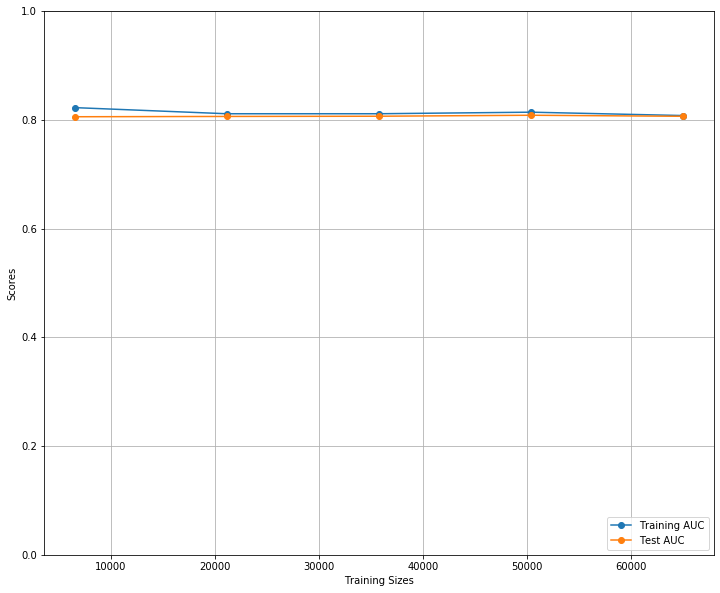

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, learning_curve, KFold

my_cv = KFold(10, shuffle=True)

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_sub_train, y_sub_train)

curve = learning_curve(model, X_sub_train, y_sub_train, cv=my_cv, scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

In [26]:
cross_val_score(model, X_sub_train, y_sub_train, cv=my_cv, scoring='roc_auc', n_jobs=-1)

array([0.80087333, 0.80110798, 0.81348156, 0.80685191, 0.80637713,
       0.80959939, 0.80073593, 0.81259818, 0.80318937, 0.82237206])

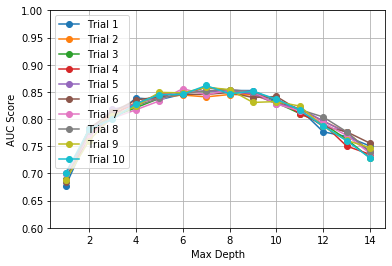

In [27]:
scores = []
for max_depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(model, X_sub_train, y_sub_train, scoring='roc_auc', cv=my_cv))
    
plt.plot(range(1, 15), scores, '-o');
plt.ylim([0.6, 1])
plt.xlabel('Max Depth')
plt.ylabel('AUC Score')
plt.grid()
plt.legend([f'Trial {i+1}' for i in range(len(scores))])

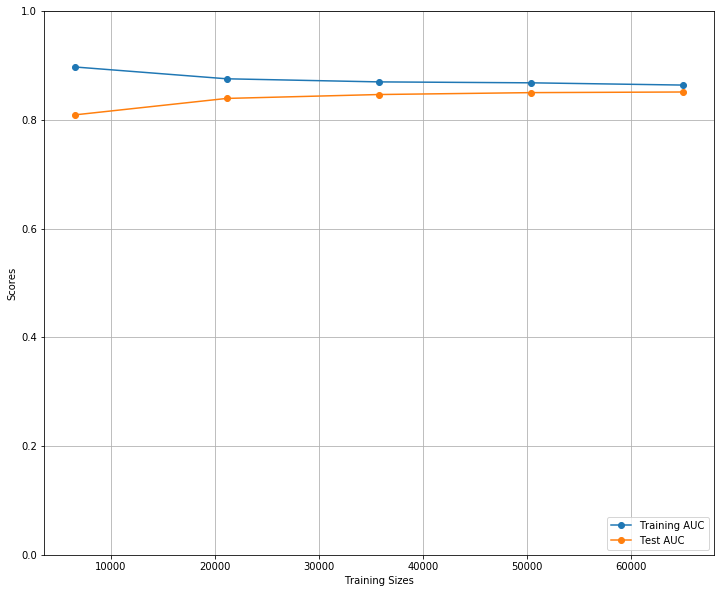

In [28]:
model = DecisionTreeClassifier(max_depth=7)

model.fit(X_sub_train, y_sub_train)

curve = learning_curve(model, X_sub_train, y_sub_train, cv=my_cv, scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

In [29]:
cross_val_score(model, X_sub_train, y_sub_train, cv=my_cv, scoring='roc_auc', n_jobs=-1)

array([0.8513833 , 0.85500625, 0.8536747 , 0.85827663, 0.85376031,
       0.85452406, 0.84636987, 0.85043436, 0.8554644 , 0.84452781])

## Regressão Logistica

In [32]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=2000)

results = cross_val_score(logistic, X_sub_train, y_sub_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8604703511663508, 0.005710704798379384)

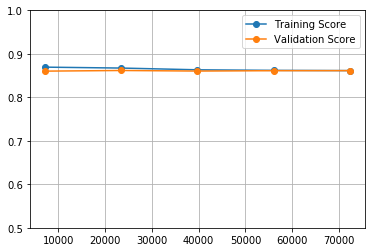

In [33]:
curves = learning_curve(LogisticRegression(max_iter=2000), X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o', label='Validation Score');
plt.ylim([0.5, 1])
plt.legend()
plt.grid()

## Bagging

In [36]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(
            base_estimator= DecisionTreeClassifier(max_depth=7), 
            n_estimators= 100,
            oob_score= True
)

results = cross_val_score(bagging, X_sub_train, y_sub_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8663937169396215, 0.004417216664473567)

## ROC Score Comparison 

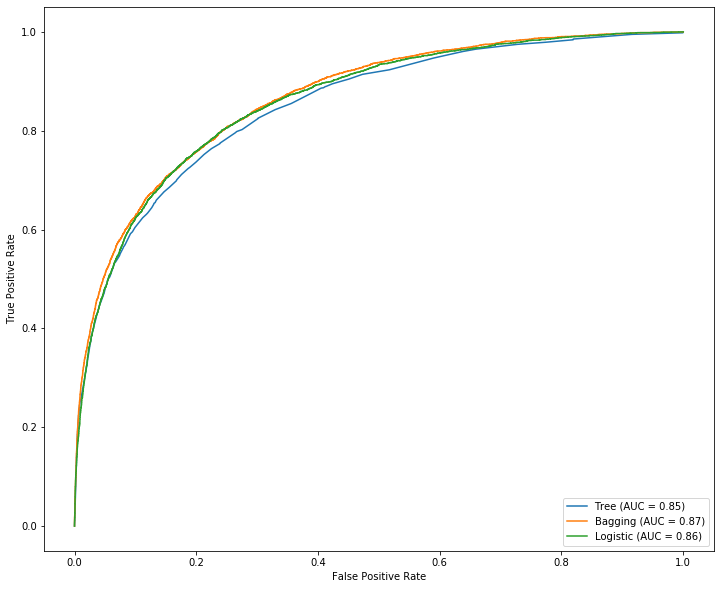

In [41]:
logistic = LogisticRegression(max_iter=2000).fit(X_sub_train, y_sub_train)
#model.fit(X_sub_train, y_sub_train)
bagging.fit(X_sub_train, y_sub_train)

fig, ax = plt.subplots(figsize = (12,10))

plot_roc_curve(model, X_val, y_val, name='Tree', ax=ax)
plot_roc_curve(bagging, X_val, y_val, name='Bagging', ax=ax)
plot_roc_curve(logistic, X_val, y_val, name='Logistic', ax=ax)